In [248]:
# Import Dependencies

import pandas as pd
import numpy as np
from pathlib import Path
import csv 
import matplotlib.pyplot as plt
import scipy.stats as st




In [249]:
# Create a path for imported csv 

heart_path = Path("Resources/heart_2020_cleaned.csv")
heart_disease_df = pd.read_csv(heart_path, low_memory=False)

heart_disease_df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [250]:
# Choose 

reduced_df = heart_disease_df[["HeartDisease", "BMI", "Smoking", "Sex", "AlcoholDrinking",
                                    "AgeCategory", "PhysicalActivity", "SleepTime"]]

reduced_df.head()

,HeartDisease,BMI,Smoking,Sex,AlcoholDrinking,AgeCategory,PhysicalActivity,SleepTime
0,No,16.60,Yes,Female,No,55-59,Yes,5.0
1,No,20.34,No,Female,No,80 or older,Yes,7.0
2,No,26.58,Yes,Male,No,65-69,Yes,8.0
3,No,24.21,No,Female,No,75-79,No,6.0
4,No,23.71,No,Female,No,40-44,Yes,8.0


In [251]:
renamed_df = reduced_df.rename(columns={"HeartDisease":"Heart Disease",
                                              "AlcoholDrinking":"Alcohol Drinking",
                                              "AgeCategory":"Age Category",
                                              "PhysicalActivity":"Physical Activity",
                                              "SleepTime":"Sleep Time"})
                                            
                                                                                                
renamed_df.head(10)                                         
                                           

,Heart Disease,BMI,Smoking,Sex,Alcohol Drinking,Age Category,Physical Activity,Sleep Time
0,No,16.60,Yes,Female,No,55-59,Yes,5.0
1,No,20.34,No,Female,No,80 or older,Yes,7.0
2,No,26.58,Yes,Male,No,65-69,Yes,8.0
3,No,24.21,No,Female,No,75-79,No,6.0
4,No,23.71,No,Female,No,40-44,Yes,8.0
5,Yes,28.87,Yes,Female,No,75-79,No,12.0
6,No,21.63,No,Female,No,70-74,Yes,4.0
7,No,31.64,Yes,Female,No,80 or older,No,9.0
8,No,26.45,No,Female,No,80 or older,No,5.0
9,No,40.69,No,Male,No,65-69,Yes,10.0


In [252]:
# Types of variables we are using (floats, object)

renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Heart Disease      319795 non-null  object 
 1   BMI                319795 non-null  float64
 2   Smoking            319795 non-null  object 
 3   Sex                319795 non-null  object 
 4   Alcohol Drinking   319795 non-null  object 
 5   Age Category       319795 non-null  object 
 6   Physical Activity  319795 non-null  object 
 7   Sleep Time         319795 non-null  float64
dtypes: float64(2), object(6)
memory usage: 19.5+ MB


# SLEEP TIME & PHYSICAL ACTIVITY ANALYSIS #

By using the binning method we will determine the sleep times in groups. From here we will determine the five sleep categories from this dataset. We will focus on the 2 extremes of the sleep categories, which are Hyposomnia and Hypersomnia. Hyposonmia is when the individual gets less than 4 hours of sleep. Meanwhile, individuals who get more than 12 hours of sleep, suffer from Hypersonmia. 

Five variables were created using the dataframe: "total_sleep", "physical_group", "heart_group", "sleep_heart_percent" and "heart_physical". These variables are used to determine the visualizations, that were used for analyzing sleep time and physical activity. We also thought of combining the sleep categories with physical activity too. This way, we wanted to see if there was a certain sleep category that was linked to Heart Disease.




The pie chart shows the individuals based off the five categories. Almost two thirds of the data show that individuals are getting the proper amount of sleep. In terms of the two extremes, only 3.5% are getting very limited sleep (less than 4 hours), will 0.3% are sleeping at a very high unhealthy amount of over 12 hours.





For Physical Activity we compared it to both the Sleep Categories, as well as Heart Disease. We wanted to see if we the certain sleep categories have an impact on heart disease. From the analysis, it shows that Hypersomnia has the greatest impact in terms of physical activity and sleep categories. For heart disease it shows that only 9884 individuals have heart disease and do not get any physical activity. This is calculated to a 3.1% of the entire dataset. It shows that physical activity has a marginal impact on heart disease. 

In [253]:
# Displaying the summary statistics for Sleep Time 

renamed_df["Sleep Time"].describe()


count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: Sleep Time, dtype: float64

In [254]:
# Create the bins and labels to create the Sleep Categories 

sleep_bins = [0, 4, 6, 9, 12, 24]
sleep_labels = ["Hyposomnia <4", "Less than Ideal 4-6", "Ideal/Recommended 7-9", "Above Average 10-12", "Hypersomnia >12"]

In [255]:
# Create a new columnm called "Sleep Category" that will indicate the type of sleep each person is getting.

renamed_df["Sleep Category"] = pd.cut(renamed_df["Sleep Time"], bins=sleep_bins, labels=sleep_labels)

renamed_df.head(15)

,Heart Disease,BMI,Smoking,Sex,Alcohol Drinking,Age Category,Physical Activity,Sleep Time,Sleep Category
0,No,16.60,Yes,Female,No,55-59,Yes,5.0,Less than Ideal 4-6
1,No,20.34,No,Female,No,80 or older,Yes,7.0,Ideal/Recommended 7-9
2,No,26.58,Yes,Male,No,65-69,Yes,8.0,Ideal/Recommended 7-9
3,No,24.21,No,Female,No,75-79,No,6.0,Less than Ideal 4-6
4,No,23.71,No,Female,No,40-44,Yes,8.0,Ideal/Recommended 7-9
5,Yes,28.87,Yes,Female,No,75-79,No,12.0,Above Average 10-12
6,No,21.63,No,Female,No,70-74,Yes,4.0,Hyposomnia <4
7,No,31.64,Yes,Female,No,80 or older,No,9.0,Ideal/Recommended 7-9
8,No,26.45,No,Female,No,80 or older,No,5.0,Less than Ideal 4-6
9,No,40.69,No,Male,No,65-69,Yes,10.0,Above Average 10-12


In [256]:
# Creating a dataframe just for the 5 Sleep Categories

total_sleep = renamed_df.groupby("Sleep Category")["Sleep Category"].count()

total_sleep

Sleep Category
Hyposomnia <4             11081
Less than Ideal 4-6       85905
Ideal/Recommended 7-9    211394
Above Average 10-12       10416
Hypersomnia >12             999
Name: Sleep Category, dtype: int64

In [257]:
# Breaking down the number of per Sleep Category, while taking into account if the individual is also physically active.

physical_group = renamed_df.groupby(["Sleep Category", "Physical Activity"]).size().unstack()

physical_group



Physical Activity,No,Yes
Sleep Category,,
Hyposomnia <4,4221,6860
Less than Ideal 4-6,22208,63697
Ideal/Recommended 7-9,40592,170802
Above Average 10-12,4313,6103
Hypersomnia >12,504,495


In [258]:
# Breakdown the individuals who do and do not have heart disease as per the five sleep categories.

heart_group = pd.DataFrame(renamed_df.groupby(["Sleep Category", "Heart Disease"]).size().unstack())

heart_group

Heart Disease,No,Yes
Sleep Category,,
Hyposomnia <4,9366,1715
Less than Ideal 4-6,78448,7457
Ideal/Recommended 7-9,195015,16379
Above Average 10-12,8762,1654
Hypersomnia >12,831,168


In [259]:
# Heart Disease percentage based off the five sleep categories

sleep_heart_percent = heart_group.div(heart_group.sum(axis=1), axis=0) * 100

sleep_heart_percent


Heart Disease,No,Yes
Sleep Category,,
Hyposomnia <4,84.523057,15.476943
Less than Ideal 4-6,91.319481,8.680519
Ideal/Recommended 7-9,92.251909,7.748091
Above Average 10-12,84.120584,15.879416
Hypersomnia >12,83.183183,16.816817


In [260]:
# The number of people who have heart disease vs. Physical Activity

heart_physical = renamed_df.groupby(["Heart Disease", "Physical Activity"]).size().unstack()

heart_physical

Physical Activity,No,Yes
Heart Disease,,
No,61954,230468
Yes,9884,17489


# VISUALIZATIONS #

Below there are visualizations incorporating the sleep categories, physical activity and heart disease percentage.

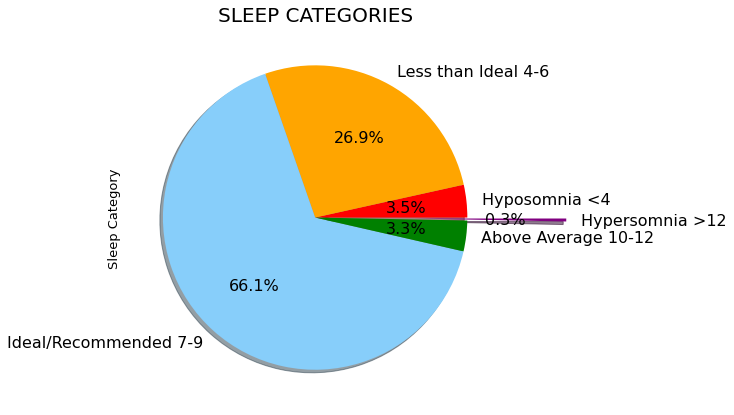

In [337]:
# Pie Chart Visualization 

# Plotting the title called "Sleep Categories"
plt.title("SLEEP CATEGORIES")

colors = ["red", "orange", "lightskyblue", "green", "purple"]


explode = [0, 0, 0, 0, 0.65]

plot = total_sleep.plot.pie(figsize=(7,7), explode=explode, colors=colors,
                            autopct="%1.1f%%", textprops={"fontsize": 16}, shadow=True)  
                                                                
       

# Inputting title "size"        
        
partitle = {"titlesize":24}



    
# Save Visualization as PNG file 

plt.savefig("Images/Sleep_Categories_Pie_chart.png", bbox_inches="tight")
    
    
    

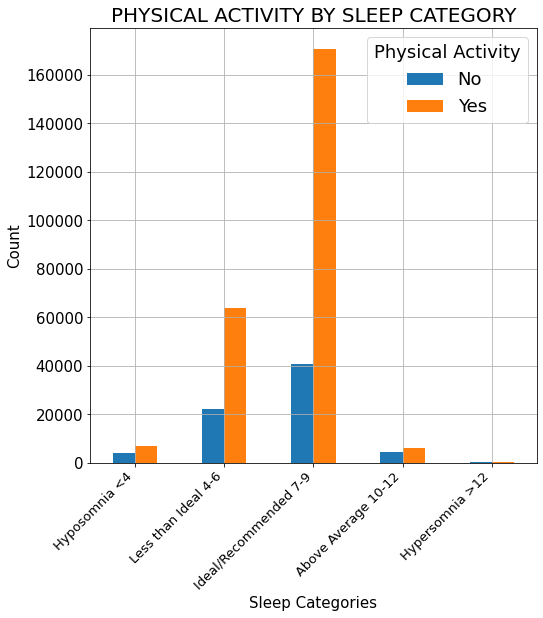

In [329]:
# Double Bar Graph for Physical Activity, while incorporating the five sleep groups. 

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

physical_group.plot(kind = "bar", figsize=(8,8), grid=True, 
                 title = "PHYSICAL ACTIVITY BY SLEEP CATEGORY",
                 xlabel = "Sleep Categories", 
                 ylabel = "Count")


par = {"axes.titlesize":20}
plt.rcParams.update(par)
plt.rc("axes", labelsize=MEDIUM_SIZE)


# Rotate x-axis    
plt.xticks(rotation=45, ha="right")   
plt.rc("xtick", labelsize = MEDIUM_SIZE)



# Save Visualization as PNG file 

plt.savefig("Images/PhysicalActivity_vs_Sleep_DoubleBar_chart.png", bbox_inches="tight")



plt.show()

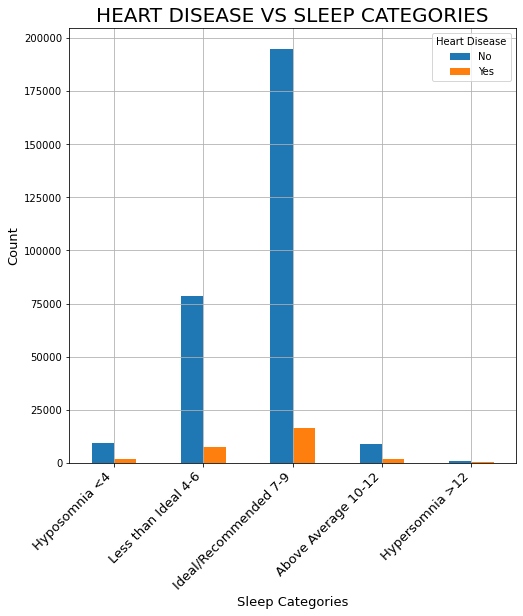

In [282]:
# Double Bar Graph Visualization for individuals with Heart Disease. 

# Calculate the percentage of each row in the Heart Disease vs. Sleep Category dataframe

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

heart_group.plot(kind ="bar", figsize=(8,8), grid=True,
                title = "HEART DISEASE VS SLEEP CATEGORIES",
                xlabel = "Sleep Categories",
                ylabel = "Count",
                stacked=False)
           

    
    
# Rotate x-axis
plt.xticks(rotation=45, ha="right")


# Save visualization as PNG file

plt.savefig("Images/HeartDisease_vs_Sleep_Double_bar_chart.png", bbox_inches="tight")


plt.show()

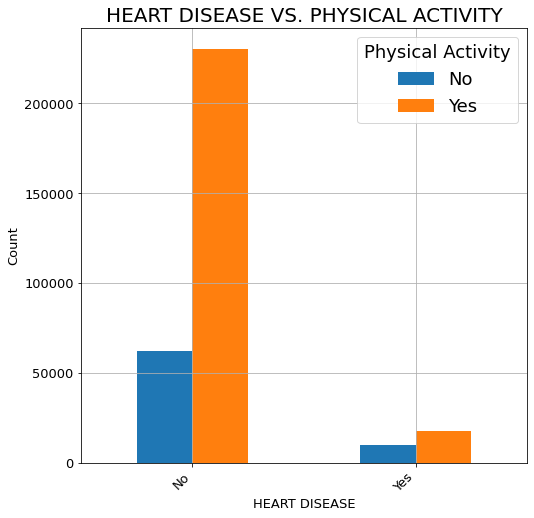

In [292]:
# Double Bar Graph Visualization for Heart Disease vs. Physical Activity. 

# Calculate the percentage of each row in the Heart Disease vs. Sleep Category dataframe

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

heart_physical.plot(kind ="bar", figsize=(8,8), grid=True, 
                title = "HEART DISEASE VS. PHYSICAL ACTIVITY",
                xlabel = "HEART DISEASE",
                ylabel = "Count",
                stacked=False)
           
                               
# Rotate x-axis, plotting x axes and y axes 
plt.xticks(rotation=45, ha="right")
plt.rc("xtick", labelsize = MEDIUM_SIZE)
plt.rc("ytick", labelsize = MEDIUM_SIZE)

# Save visualization as PNG file

plt.savefig("Images/HeartDisease_vs_PhyiscalActivity_Double_bar_chart.png", bbox_inches="tight")


plt.show()

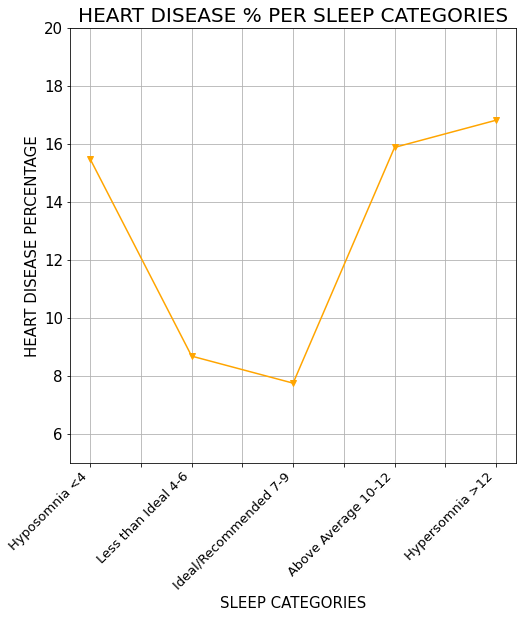

In [326]:
# Line Graph Visualization for Heart Disease Percentage vs. 5 Sleep Categories



sleep_heart_percent["Yes"].plot(kind ="line", figsize=(8,8), grid=True, marker="v", color="orange",
                title = "HEART DISEASE % PER SLEEP CATEGORIES",
                xlabel = "SLEEP CATEGORIES",
                ylabel = "HEART DISEASE PERCENTAGE") 

# Set limits for the y-axis

plt.ylim(5,20) 


         
           
                               
# Rotate x-axis, set x ticks, x axes and y axes size
plt.xticks(rotation=45, ha="right")


# Save visualization as PNG file

plt.savefig("Images/HeartDisease_Percentage_vs_Sleep_line_chart.png", bbox_inches="tight")


plt.show()


